In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('cleaned_property_data.csv')

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3845 entries, 0 to 3844
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRICE           3845 non-null   float64
 1   BEDS            3845 non-null   float64
 2   TYPE            3845 non-null   object 
 3   BATH            3845 non-null   float64
 4   PROPERTYSQFT    3845 non-null   float64
 5   LATITUDE        3845 non-null   float64
 6   LONGITUDE       3845 non-null   float64
 7   STREET_NAME     3845 non-null   object 
 8   LONG_NAME       3845 non-null   object 
 9   ZIPCODE         3845 non-null   int64  
 10  Borough         3845 non-null   object 
 11  Neighborhood    3845 non-null   object 
 12  ZIP Codes       3845 non-null   int64  
 13  PRICE_PER_SQFT  3845 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 420.7+ KB
None


## Exploratory Data Analysis

In [7]:
print(df.describe())

              PRICE         BEDS         BATH  PROPERTYSQFT     LATITUDE  \
count  3.845000e+03  3845.000000  3845.000000   3845.000000  3845.000000   
mean   9.182846e+05     3.146164     2.119116   1857.900705    40.713286   
std    6.341462e+05     2.173764     1.444872   1067.045981     0.089621   
min    1.000000e+05     1.000000     1.000000    250.000000    40.499798   
25%    4.500000e+05     2.000000     1.000000   1100.000000    40.635105   
50%    7.499990e+05     3.000000     2.000000   2135.000000    40.724424   
75%    1.200000e+06     4.000000     2.500000   2184.207862    40.772093   
max    3.000000e+06    24.000000    32.000000  21000.000000    40.912729   

         LONGITUDE       ZIPCODE     ZIP Codes  PRICE_PER_SQFT  
count  3845.000000   3845.000000   3845.000000     3845.000000  
mean    -73.933317  10827.862679  10827.862679      546.833479  
std       0.102018    556.685166    556.685166      361.820010  
min     -74.253033  10001.000000  10001.000000       49

Price: The price of the properties is the target variable that we are trying to predict. We need to check the distribution of the price variable to understand the range of prices we are dealing with.
- Mean: $918,284.60, indicating the average property price.
- Standard Deviation: $634,146.20, showing high variability in prices.
- Range: From $100,000 to $3,000,000, highlighting the wide range of property values.

Bedrooms: The number of bedrooms in a property is an essential feature that can influence the price.
- Mean: 3.15 bedrooms, suggesting most properties have around 3 bedrooms.
- Standard Deviation: 2.17 bedrooms, indicating a moderate variation.
- Range: 1 to 24 bedrooms, showing the diversity in property sizes.

Bathrooms: The number of bathrooms in a property is another crucial feature that can affect the price.
- Mean: 2.12 bathrooms, implying most properties have at least 2 bathrooms.
- Standard Deviation: 1.44 bathrooms, reflecting some variation.
- Range: 1 to 32 bathrooms, indicating some properties have a large number of bathrooms.

Property Size: The living area of the properties is an essential feature that can influence the price.
- Mean: 1,857.90 sq ft, indicating the average living area.
- Standard Deviation: 1,067.05 sq ft, showing high variability in property sizes.
- Range: 250 to 21,000 sq ft, highlighting the broad range of property sizes.

Price per Square Foot:
- Mean: $546.83, suggesting the average cost per square foot.
- Standard Deviation: $361.82, reflecting significant price variation.
- Range: $49.90 to $2,976.19, showing the diversity in price per square foot.

# Property Analysis

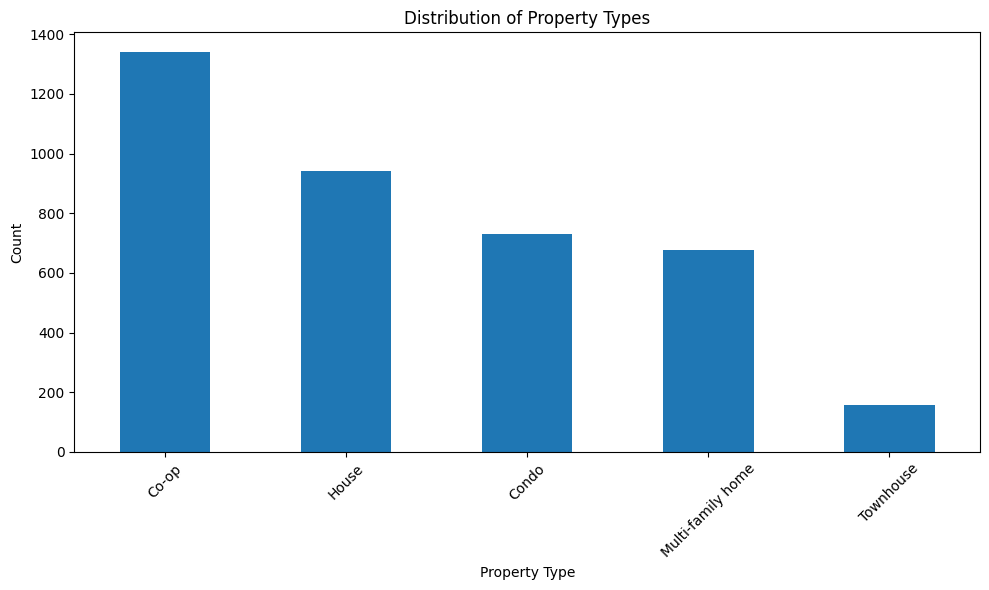

In [8]:
# Distribution of property types
plt.figure(figsize=(10, 6))
df['TYPE'].value_counts().plot(kind='bar')
plt.title('Distribution of Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribution of Property Types: The dataset contains five property types, each with a different frequency of occurrence.

- Co-ops: The most common property type, possibly due to their affordability and prevalence in urban areas.

- Houses: The second most common type, often found in suburban settings.

- Condos: Common in urban settings, providing a balance between affordability and convenience.

- Multi-family homes: Less common, typically found in areas with high population density.

- Townhouses: The least common, often located in urban or high-density suburban areas.

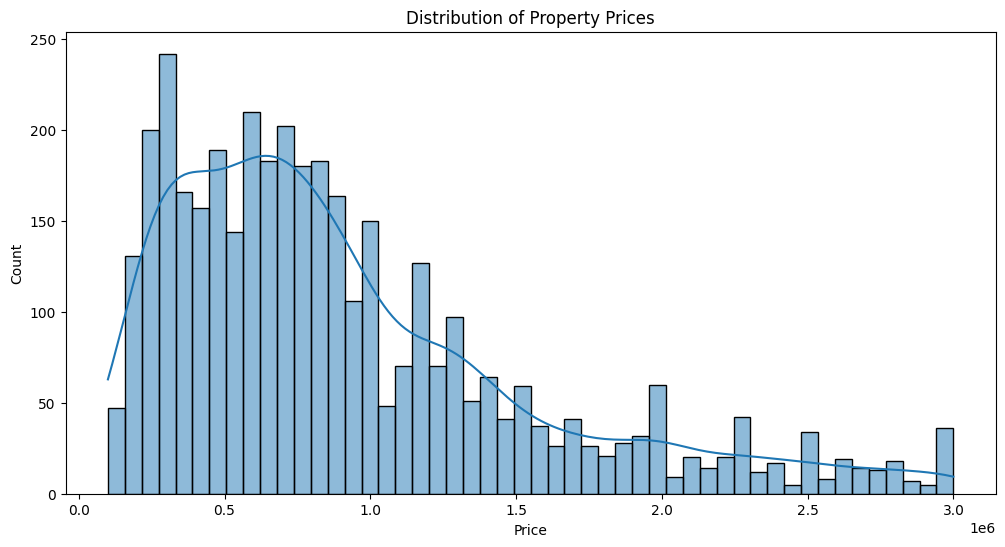

In [9]:
# Distribution of prices
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE'], bins=50, kde=True)
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

Distribution of Property Prices: The histogram of property prices shows the distribution of prices across the dataset.

- Property prices are right-skewed, with a peak around $500,000.

- The gradual decline in higher price ranges suggests fewer properties in the luxury segment.

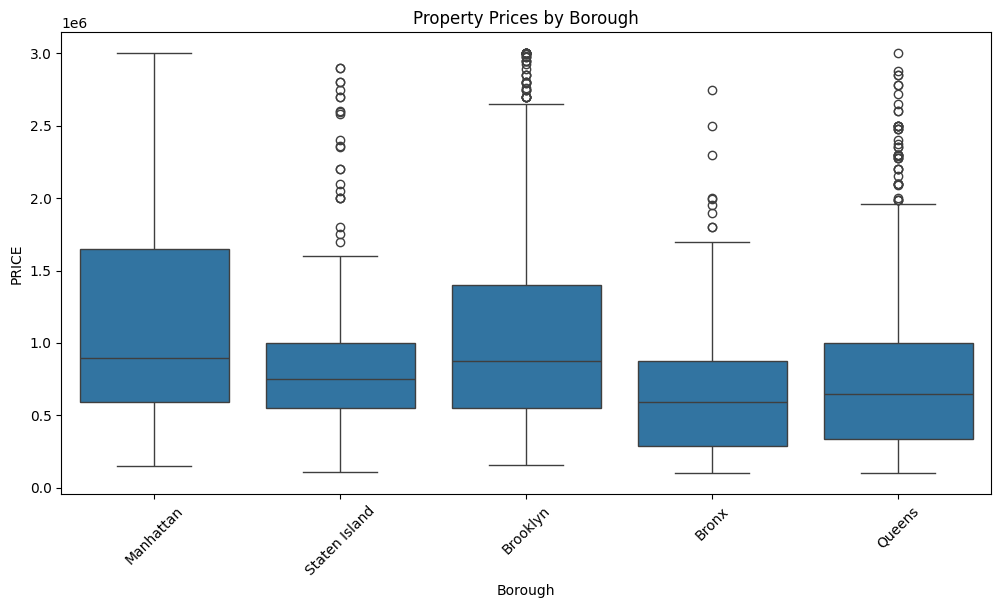

In [11]:
# Boxplot of prices by borough
plt.figure(figsize=(12, 6))
sns.boxplot(x='Borough', y='PRICE', data=df)
plt.title('Property Prices by Borough')
plt.xticks(rotation=45)
plt.show()

Property Prices by Borough: The boxplot of property prices by borough shows the distribution of prices across different boroughs.

- Manhattan: Highest median property prices, reflecting its status as a prime real estate market, with a mix of luxury and high-demand properties.

- Brooklyn: Second highest, with a mix of high-demand areas and more affordable neighborhoods, appealing to a diverse range of buyers.

- Queens: Moderate prices, offering a mix of residential and commercial properties, with a suburban feel in some areas.

- Bronx: Lower median prices, indicating more affordable housing options, with a mix of urban and suburban neighborhoods.

- Staten Island: Similar to the Bronx, with a suburban feel and more affordable properties, appealing to buyers seeking a quieter lifestyle.

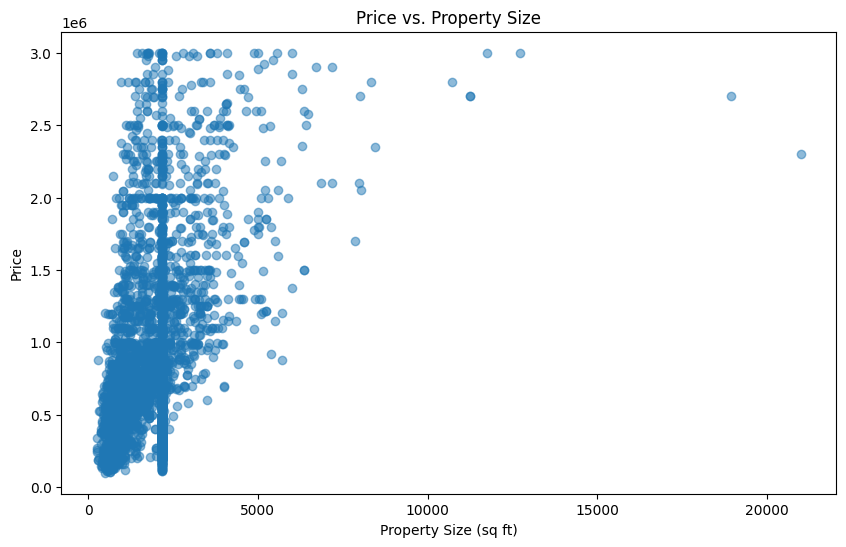

In [12]:
# Scatter plot of price vs. property size
plt.figure(figsize=(10, 6))
plt.scatter(df['PROPERTYSQFT'], df['PRICE'], alpha=0.5)
plt.title('Price vs. Property Size')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Price')
plt.show()

Price vs. Property Size: The scatter plot shows the relationship between property size and price.

- Positive correlation between property size and price, indicating larger properties are generally more expensive, as expected.

- Scatter plot shows a wide range of prices for properties of similar sizes, suggesting other factors also influence price, such as location, condition, and amenities.

## Correlation Analysis

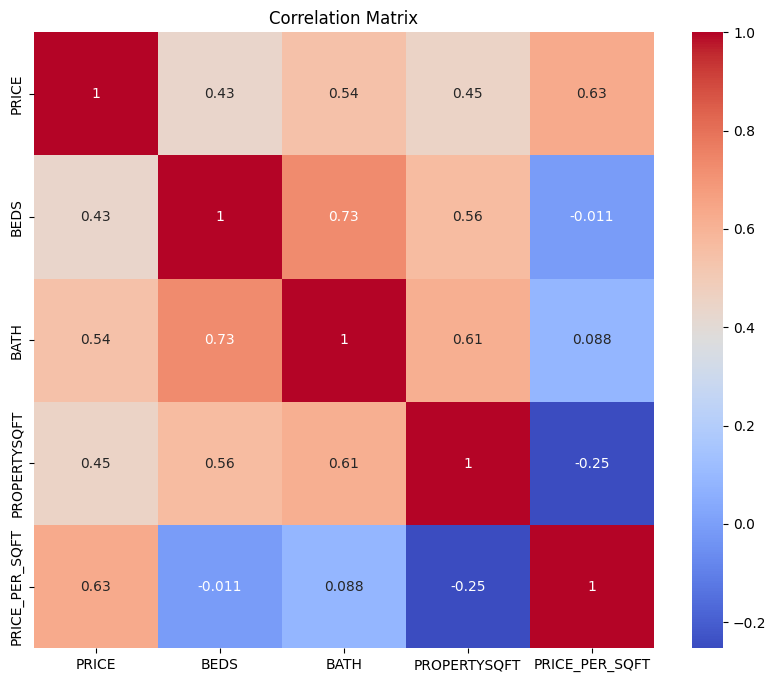

In [13]:
# Correlation matrix
corr_matrix = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE_PER_SQFT']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation Matrix: The correlation matrix shows the relationships between different features and the target variable (price).

- Price:
    - Positively correlated with the number of bedrooms (0.43), indicating more bedrooms generally increase property value, as they provide additional living space.
    - Positively correlated with the number of bathrooms (0.54), showing a similar trend, as bathrooms are essential for comfort and convenience. Bathroom also typically correlates with larger number of bedrooms/homes in general.
    - Positively correlated with property size (0.45), confirming larger properties tend to be more expensive. This is consistent with the scatter plot analysis.
    
- Price per Square Foot:
    - Highly correlated with price (0.63), suggesting properties with higher total prices also tend to have higher prices per square foot. This relationship is expected, as larger properties are likely to have higher price per square foot due to it being more luxurious or in a prime location.

## Geospatial Analysis

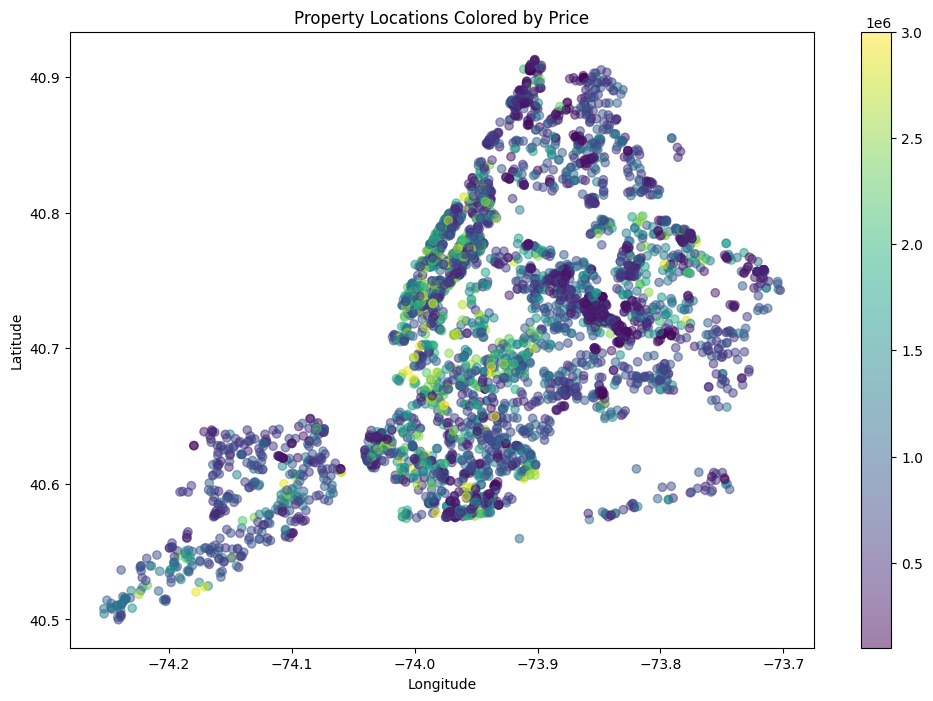

In [14]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['PRICE'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('Property Locations Colored by Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Geospatial Analysis: The geospatial analysis provides insights into the distribution of property prices across different neighborhoods and boroughs.

- Higher property prices are clustered in specific areas, reflecting prime real estate locations. These areas are likely to have high demand, amenities, and accessibility, contributing to their higher prices.

- Variations in property prices across different neighborhoods and boroughs. This highlights the importance of location in determining property values, as properties in desirable areas command higher prices.

## Price per Square Foot Analysis

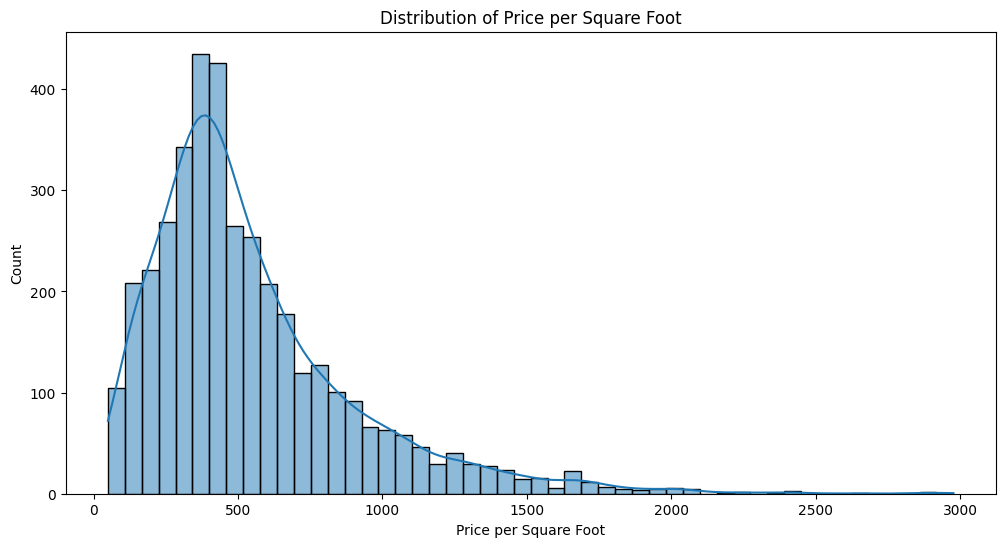

In [15]:
# Distribution of price per square foot
plt.figure(figsize=(12, 6))
sns.histplot(df['PRICE_PER_SQFT'], bins=50, kde=True)
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Count')
plt.show()

Distribution of Price per Square Foot: The histogram of price per square foot shows the distribution of prices across the dataset.

- Right-skewed distribution, with most properties priced between $300 and $700 per square foot. This range is typical for residential properties in urban and suburban areas.

- High-end properties skew the distribution to the right, indicating premium pricing for certain areas or property types. These properties are likely to be in prime locations or offer luxury amenities.

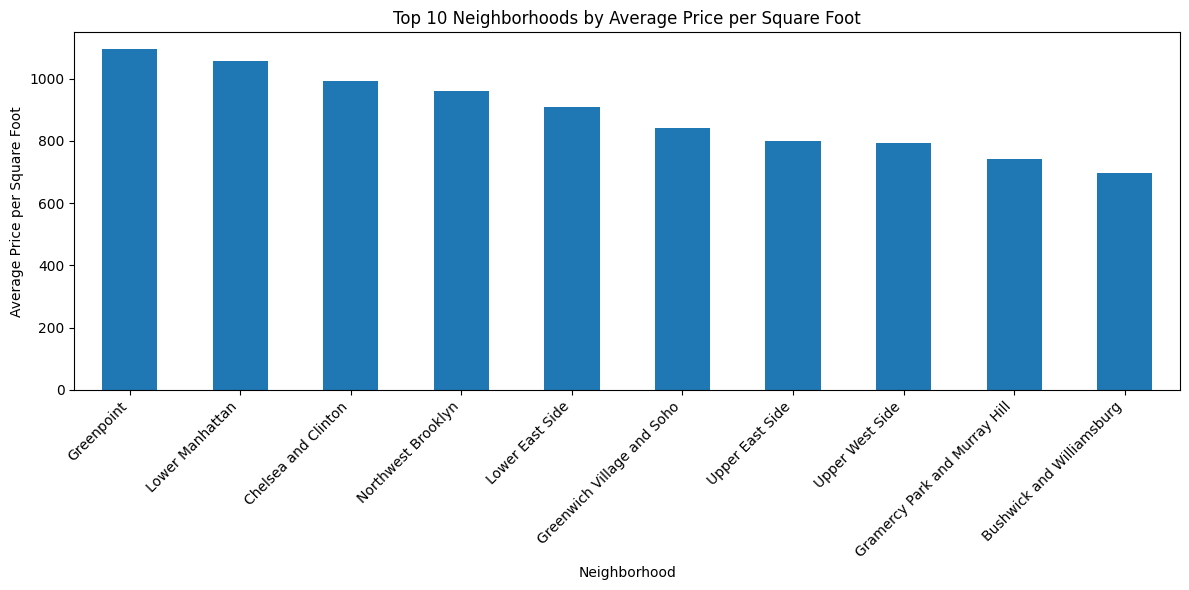

In [17]:
# Top 10 neighborhoods by average price per square foot
top_neighborhoods = df.groupby('Neighborhood')['PRICE_PER_SQFT'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_neighborhoods.plot(kind='bar')
plt.title('Top 10 Neighborhoods by Average Price per Square Foot')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price per Square Foot')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Neighborhoods by Average Price per Square Foot: The bar chart shows the top 10 neighborhoods with the highest average price per square foot.

- Greenpoint, Lower Manhattan, Chelsea and Clinton: Among the top neighborhoods with the highest average price per square foot. These neighborhoods are known for their prime locations, amenities, and high demand, contributing to their premium pricing.

- Reflects the desirability and high demand for properties in these areas. Buyers are willing to pay a premium for the location, convenience, and lifestyle these neighborhoods offer.

## Property Size Analysis

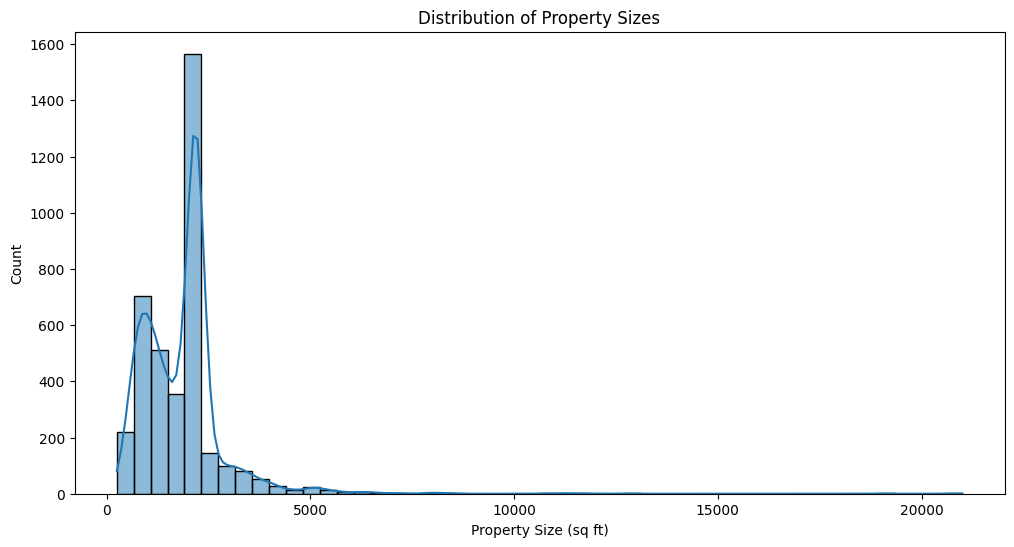

In [18]:
# Distribution of property sizes
plt.figure(figsize=(12, 6))
sns.histplot(df['PROPERTYSQFT'], bins=50, kde=True)
plt.title('Distribution of Property Sizes')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Count')
plt.show()

Distribution of Property Sizes: The histogram of property sizes shows the distribution of living areas across the dataset.

- The majority of properties have sizes less than 5,000 square feet. This is typical for residential properties, which are designed for families or individuals.

- Properties larger than 5,000 square feet are relatively rare, indicating that most properties in the dataset are designed for typical residential use rather than luxury or expansive estates. These larger properties are likely to be more expensive due to their size and amenities.

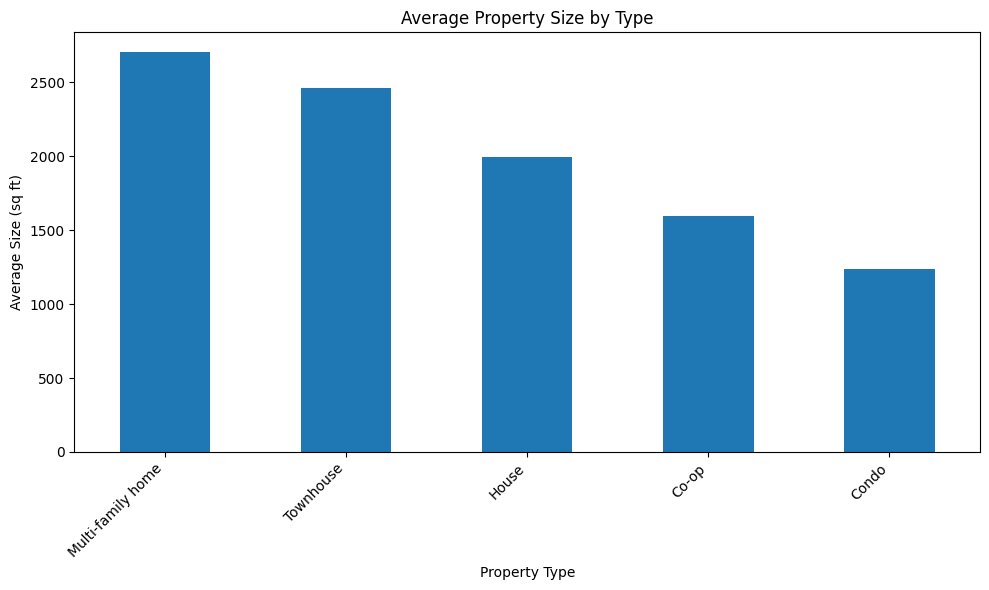

In [19]:
# Average property size by type
avg_size_by_type = df.groupby('TYPE')['PROPERTYSQFT'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_size_by_type.plot(kind='bar')
plt.title('Average Property Size by Type')
plt.xlabel('Property Type')
plt.ylabel('Average Size (sq ft)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Property Size by Type: The bar chart shows the average property size for each property type.

- Multi-family homes have the largest average size, reflecting their design to accommodate multiple households. These properties are likely to be larger to provide sufficient living space for multiple families.

- Townhouses and Houses follow, indicating they are spacious and designed for single-family living. These properties are common in suburban areas and offer more living space compared to condos and co-ops.

- Condos and Co-ops tend to have smaller sizes on average, likely due to their urban locations and design for efficiency in high-density areas. These properties are popular in urban settings where space is limited, and residents prioritize convenience and accessibility.  

## Property Analysis

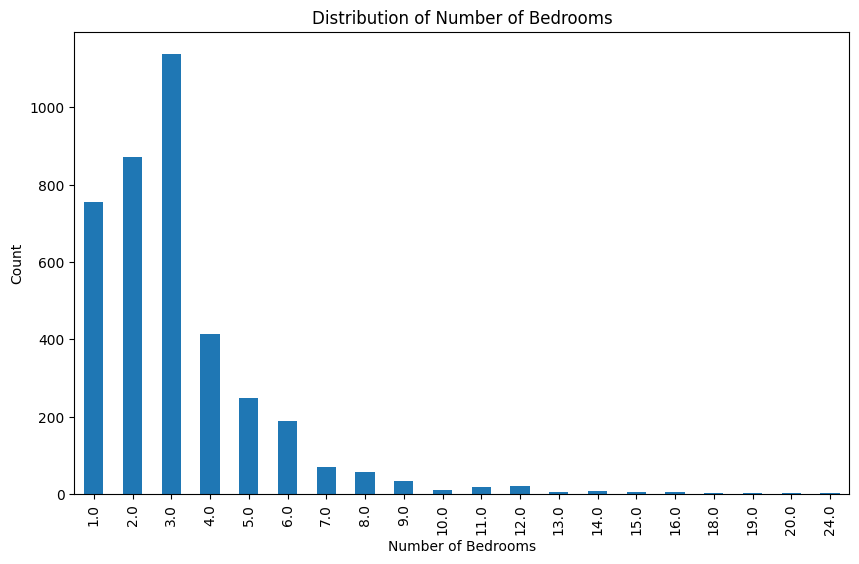

In [20]:
# Distribution of number of bedrooms
plt.figure(figsize=(10, 6))
df['BEDS'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

Distribution of Number of Bedrooms: The histogram of the number of bedrooms shows the distribution of bedrooms across the dataset.

- Most properties have between 1 and 4 bedrooms, with 3 bedrooms being the most common, which is typical for family homes. This suggests that the dataset contains a mix of properties suitable for different household sizes.

- Properties with more than 4 bedrooms are less frequent, reflecting that larger homes are less common and possibly more expensive. These properties are likely to be in high-demand areas or designed for larger families.

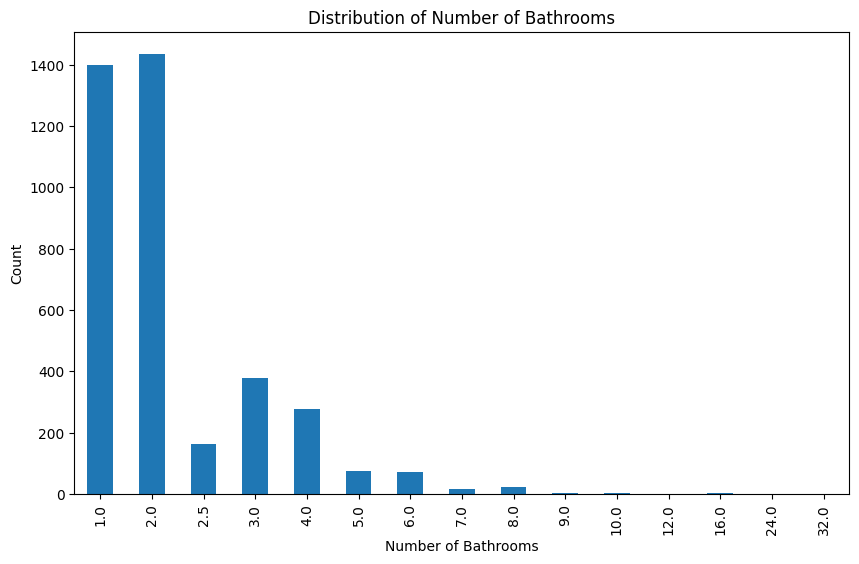

In [21]:
# Distribution of number of bathrooms
plt.figure(figsize=(10, 6))
df['BATH'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

Distribution of Number of Bathrooms: The histogram of the number of bathrooms shows the distribution of bathrooms across the dataset.

- Most properties have 1 to 2 bathrooms, with 1 and 2 bathrooms being equally common, which aligns with the typical design of most residential properties. Bathrooms are essential for comfort and convenience, and having at least 1 or 2 bathrooms is standard for most homes.

- Properties with more than 2 bathrooms are less frequent, indicating that larger homes with additional bathrooms are less common. These properties are likely to be larger or more luxurious, catering to buyers who value comfort and amenities.

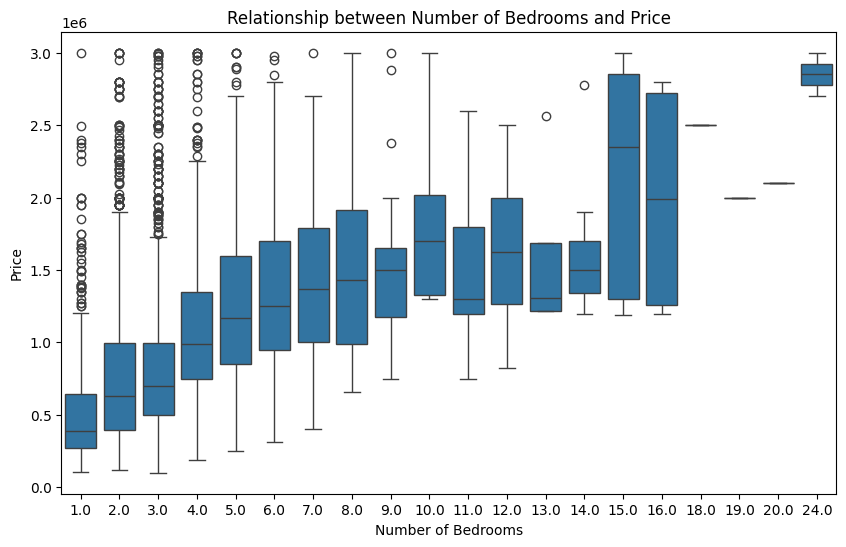

In [22]:
# Relationship between number of bedrooms and price
plt.figure(figsize=(10, 6))
sns.boxplot(x='BEDS', y='PRICE', data=df)
plt.title('Relationship between Number of Bedrooms and Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

Relationship between Number of Bedrooms and Price: The scatter plot shows the relationship between the number of bedrooms and property price.

- There is a positive relationship between the number of bedrooms and property price. Properties with more bedrooms tend to have higher prices, reflecting the additional living space and amenities they offer.

- Properties with more bedrooms tend to have higher prices, which is expected as larger homes with more bedrooms offer more living space and amenities, increasing their market value. This relationship is consistent with the correlation analysis, which showed a positive correlation between the number of bedrooms and property price.

## Borough and Neighborhood Analysis

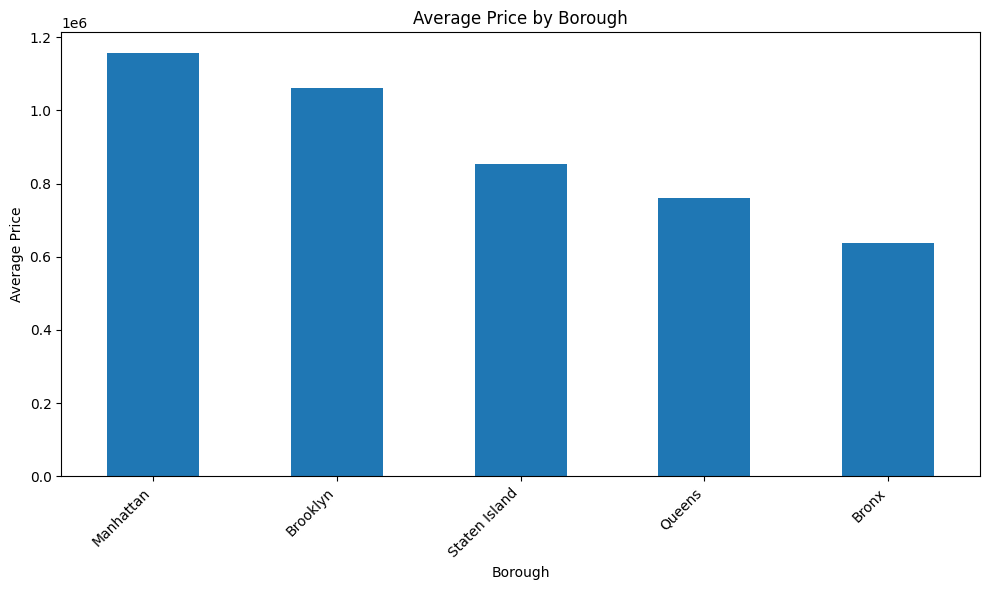

In [24]:
# Average price by borough
avg_price_by_borough = df.groupby('Borough')['PRICE'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
avg_price_by_borough.plot(kind='bar')
plt.title('Average Price by Borough')
plt.xlabel('Borough')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Average Price by Borough: The bar chart shows the average property price by borough.
- Manhattan has the highest average property price, reflecting its status as a high-demand urban center with premium real estate. The borough offers a mix of luxury properties, high-rise apartments, and exclusive neighborhoods, contributing to its high prices.

- Brooklyn follows, with a mix of upscale neighborhoods and more affordable areas. The borough appeals to a diverse range of buyers, from young professionals to families, offering a variety of housing options.

- Staten Island has relatively high prices compared to Queens and the Bronx, possibly due to its suburban feel and larger properties. The borough offers a quieter lifestyle and more space compared to other boroughs, attracting buyers seeking a more relaxed environment.

- Bronx has the lowest average property price, indicating it is the most affordable borough. The Bronx offers a mix of urban and suburban neighborhoods, providing housing options for a range of buyers, also the cheapeast which could see the greatest return on invesment if the area is gentrified.

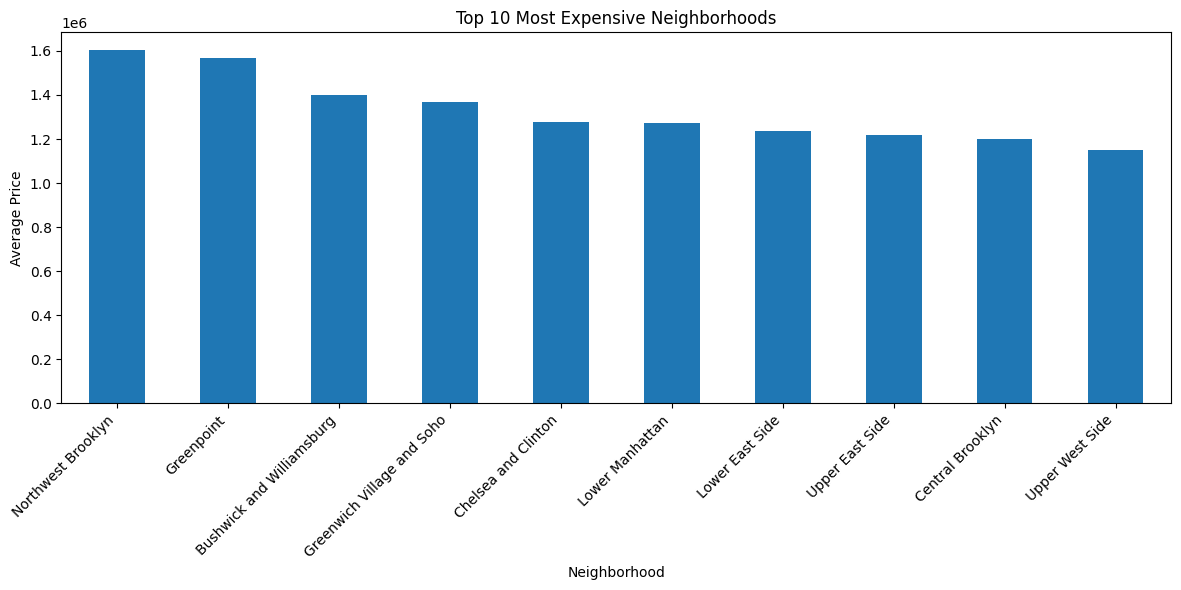

In [26]:
# Top 10 most expensive neighborhoods
top_neighborhoods = df.groupby('Neighborhood')['PRICE'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_neighborhoods.plot(kind='bar')
plt.title('Top 10 Most Expensive Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Top 10 Most Expensive Neighborhoods: The bar chart shows the top 10 most expensive neighborhoods based on average property price.

- Northwest Brooklyn and Greenpoint are the most expensive neighborhoods, followed by Bushwick and Williamsburg, and Greenwich Village and Soho in Manhattan. These neighborhoods are known for their prime locations, amenities, and lifestyle offerings, driving up property prices.

- These neighborhoods are highly desirable due to their location, amenities, and lifestyle offerings, driving up property prices. Buyers are willing to pay a premium to live in these areas, reflecting the high demand for properties in these neighborhoods.

## K-means Clustering

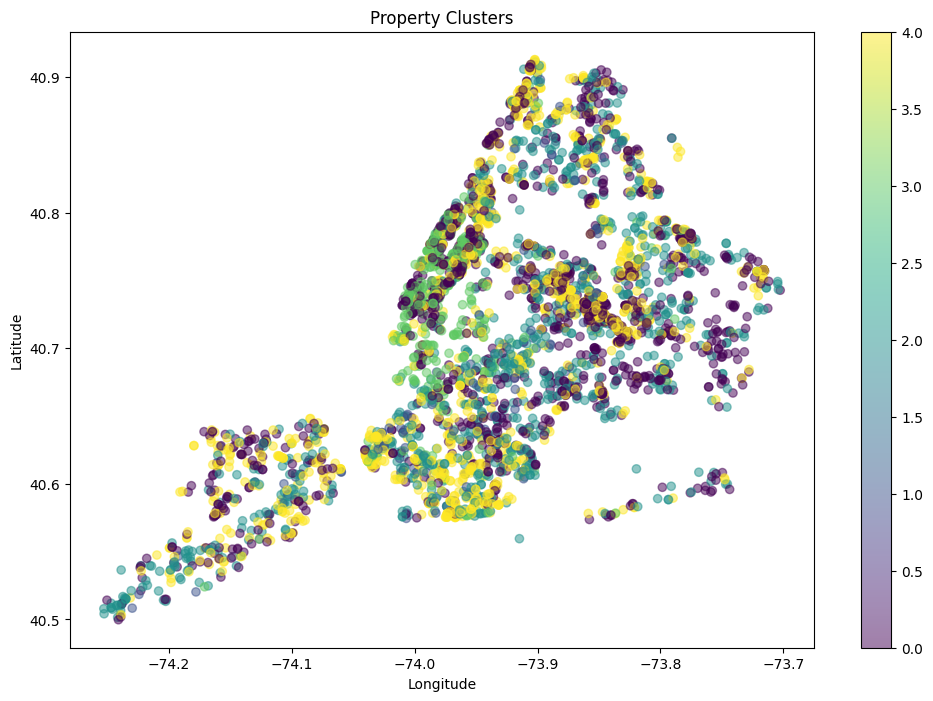

In [27]:
# Prepare data for clustering
cluster_data = df[['PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT', 'PRICE_PER_SQFT']].copy()
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data)

# Perform K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

# Visualize clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.colorbar(scatter)
plt.title('Property Clusters')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Property Clusters: The K-means clustering analysis groups properties into distinct clusters based on their features, such as price, property size, and location.

- Properties are clustered into distinct groups based on location. This allows us to identify areas with similar property characteristics and price ranges, providing insights into the real estate market.

- Noticeable price variations within clusters indicate that even within the same area, there can be significant differences in property values, likely due to factors such as property size, age, and specific neighborhood amenities. This highlights the importance of considering multiple factors when evaluating property prices.

## Statistical Tests

In [29]:
# Perform t-test to compare prices between two boroughs
borough1 = 'Manhattan'
borough2 = 'Brooklyn'
prices_borough1 = df[df['Borough'] == borough1]['PRICE']
prices_borough2 = df[df['Borough'] == borough2]['PRICE']

t_statistic, p_value = stats.ttest_ind(prices_borough1, prices_borough2)
print(f"T-test results for price comparison between {borough1} and {borough2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results for price comparison between Manhattan and Brooklyn:
T-statistic: 2.8295143596827037
P-value: 0.004712807289203896


There is a statistically significant difference in property prices between Manhattan and Brooklyn, with Manhattan generally having higher prices.

In [30]:
# Perform t-test to compare prices between two boroughs
borough1 = 'Queens'
borough2 = 'Bronx'
prices_borough1 = df[df['Borough'] == borough1]['PRICE']
prices_borough2 = df[df['Borough'] == borough2]['PRICE']

t_statistic, p_value = stats.ttest_ind(prices_borough1, prices_borough2)
print(f"T-test results for price comparison between {borough1} and {borough2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results for price comparison between Queens and Bronx:
T-statistic: 4.430951126006529
P-value: 1.0022082091463384e-05


There is a statistically significant difference in property prices between Queens and Bronx, with Queens having higher prices.

In [32]:
# Perform t-test to compare prices between two boroughs
borough1 = 'Queens'
borough2 = 'Brooklyn'
prices_borough1 = df[df['Borough'] == borough1]['PRICE']
prices_borough2 = df[df['Borough'] == borough2]['PRICE']

t_statistic, p_value = stats.ttest_ind(prices_borough1, prices_borough2)
print(f"T-test results for price comparison between {borough1} and {borough2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results for price comparison between Queens and Brooklyn:
T-statistic: -11.524418012542085
P-value: 7.234716553164959e-30


 There is a statistically significant difference in property prices between Queens and Brooklyn, with Brooklyn having higher prices.

In [34]:
# Perform t-test to compare prices between two boroughs
borough1 = 'Queens'
borough2 = 'Manhattan'
prices_borough1 = df[df['Borough'] == borough1]['PRICE']
prices_borough2 = df[df['Borough'] == borough2]['PRICE']

t_statistic, p_value = stats.ttest_ind(prices_borough1, prices_borough2)
print(f"T-test results for price comparison between {borough1} and {borough2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results for price comparison between Queens and Manhattan:
T-statistic: -13.835183546819849
P-value: 1.3722901220608582e-41


There is a statistically significant difference in property prices between Queens and Manhattan, with Manhattan having higher prices.

In [35]:
# Perform t-test to compare prices between two boroughs
borough1 = 'Bronx'
borough2 = 'Brooklyn'
prices_borough1 = df[df['Borough'] == borough1]['PRICE']
prices_borough2 = df[df['Borough'] == borough2]['PRICE']

t_statistic, p_value = stats.ttest_ind(prices_borough1, prices_borough2)
print(f"T-test results for price comparison between {borough1} and {borough2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results for price comparison between Bronx and Brooklyn:
T-statistic: -12.165736029087775
P-value: 1.6028134424144571e-32


There is a statistically significant difference in property prices between Bronx and Brooklyn, with Brooklyn having higher prices.

In [36]:
# Perform t-test to compare prices between two boroughs
borough1 = 'Manhattan'
borough2 = 'Staten Island'
prices_borough1 = df[df['Borough'] == borough1]['PRICE']
prices_borough2 = df[df['Borough'] == borough2]['PRICE']

t_statistic, p_value = stats.ttest_ind(prices_borough1, prices_borough2)
print(f"T-test results for price comparison between {borough1} and {borough2}:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-test results for price comparison between Manhattan and Staten Island:
T-statistic: 7.607174368551421
P-value: 5.572763035834715e-14


There is a statistically significant difference in property prices between Manhattan and Staten Island, with Manhattan having higher prices.

t-test results for property prices between different boroughs:

- These t-test results indicate significant differences in property prices between the compared boroughs, confirming the variation in real estate markets within the city. This information is crucial for understanding the relative affordability and market dynamics in different parts of the city. 

- The results provide insights into the pricing trends and demand for properties in each borough, helping buyers, sellers, and investors make informed decisions based on the statistical evidence.